Realizado por: Cesar Quintero

In [ ]:
# Se importa la librería para trabajo con arreglos:
import  numpy as np
n = 10  # dimensión de la matriz

# La función random de la librería numpy, permite crear números aleatorios.

A = np.random.rand(n, n)  # se crea una matriz nxn de números aleatorios.
b = np.random.rand(n) # se crea un vector de variables independientes.

alpha = 3* n # factor de incremento.
# A continuación, se crea una matriz ADD, en la cual se asegura que sea diagonal 
# dominante, de la siguiente manera: Al multiplicar A por su traspuesta, se obtiene
# una matriz inicial que tiene valores diagonales mayores, pero para asegurar que sea
# diagonal dominante, se suma un factor de incremento 'alpha' a la diagonal principal.
ADD = np.dot(A, A.T) + alpha * np.identity(n)

# se iguala A, a la matriz domiante:
A = ADD

In [ ]:
# se halla el determinante:
determ = np.linalg.det(A)

In [ ]:
# Comprobar la diagonal dominante
n = len(b)
count = 0
for i in range(n):
  Aii = A[i][i]
  suma = 0
  for j in range(n):
    if i != j:
      suma = suma + abs(A[i][j])
  if Aii > suma:
    print("La fila", i, " es diagonal dominate. ")
    count += 1
  else:
    print("La fila", i, " es NO diagonal dominate. ")
    break
if count == n:
  print("La matriz es diagonal dominante y el método va a converger. ")
else:
  print("La matriz No es diagonal dominante, por tanto el método NO va a converger. ")


La fila 0  es diagonal dominate. 
La fila 1  es diagonal dominate. 
La fila 2  es diagonal dominate. 
La fila 3  es diagonal dominate. 
La fila 4  es diagonal dominate. 
La fila 5  es diagonal dominate. 
La fila 6  es diagonal dominate. 
La fila 7  es diagonal dominate. 
La fila 8  es diagonal dominate. 
La fila 9  es diagonal dominate. 
La matriz es diagonal dominante y el método va a converger. 


In [ ]:
# valores iniciales
tol = 1e-6  # tolerancia
error = 100000 
nitermax = 100
n = len(A)
x = np.zeros(n)
x1 = np.zeros(n)
niter = 0  # contador inicial iteraciones
Niter = []
Error = []

# Programación del método:
while niter < nitermax and error > tol:
  for i in range(n):  # redorre filas
    d = b[i]
    for j in range(n):  # recorre columnas
      if i != j:
        d = d - A[i][j] * x[j]
    x[i] = d / A[i][i]

# Elementos adicionales:
  error = np.linalg.norm(x-x1)  # cálculo de la norma vector
  x1 = np.copy(x)   #  actualiza vector solución iteración anterior

  print("Iteración:", niter)
  print(x)
  print("Error en la iteración", niter,"es: ",error)

  niter += 1
  Niter.append(niter)
  Error.append(error)



Iteración: 0
[ 0.01778399  0.01157825  0.01559455  0.02329155  0.00260177  0.01694815
  0.01722718  0.01562299 -0.00260182  0.00118142]
Error en la iteración 0 es:  0.04559649137531135
Iteración: 1
[ 1.02506734e-02  2.64028665e-03  1.02125347e-02  1.98122305e-02
 -1.20160226e-05  1.62986006e-02  1.90137979e-02  1.74474947e-02
 -1.44474513e-03  3.25638645e-03]
Error en la iteración 1 es:  0.014040250481961614
Iteración: 2
[ 0.01145444  0.00315666  0.01015816  0.01940908 -0.0005885   0.01561238
  0.01863117  0.01735056 -0.00148229  0.00331653]
Error en la iteración 2 es:  0.0016867808287591426
Iteración: 3
[ 0.01158279  0.0033922   0.01032546  0.01954672 -0.00052631  0.01558924
  0.01855951  0.0173068  -0.00151544  0.0032673 ]
Error en la iteración 3 es:  0.0003658717880860007
Iteración: 4
[ 0.01155136  0.00337954  0.010329    0.0195647  -0.00050533  0.0156079
  0.01856694  0.0173081  -0.00151548  0.00326467]
Error en la iteración 4 es:  4.833082562108153e-05
Iteración: 5
[ 0.0115471   0

In [ ]:
print(Niter)
print(Error)

[1, 2, 3, 4, 5, 6, 7, 8]
[0.04559649137531135, 0.014040250481961614, 0.0016867808287591426, 0.0003658717880860007, 4.833082562108153e-05, 1.092873331459377e-05, 1.341828568859071e-06, 3.1992577013667225e-07]


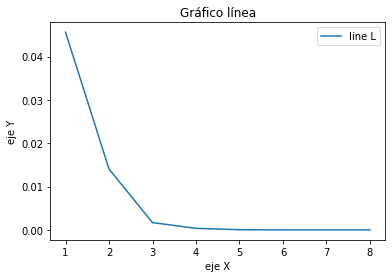

In [ ]:
# Grafica del error Jacobi

import matplotlib.pyplot as plt

x = Niter
y = Error

plt.plot(x, y, label="line L")
plt.plot()

plt.xlabel("eje X")
plt.ylabel("eje Y")
plt.title("Gráfico línea")
plt.legend()
plt.show()


In [ ]:
# Método de SOR

def SOR(A,b,x,imax,es,omega):
  n = len(x)
  for i in range(n):
    dummy = A[i][i]
    for j in range(n):
      A[i][j] = A[i][j] / dummy

    b[i] = b[i] / dummy

  for i in range(n):
    sum = b[i]
    for j in range(n):
      if i != j:
        sum -= A[i][j] * x[j]
    x[i] = sum

  iter = 1


  while iter <= imax or ea > tol:
    centinela = 1
    for i in range(n):
      old = x[i]
      sum = b[i]
      for j in range(n):
        if i != j:
          sum -= A[i][j] * x[j]

      x[i] = omega * sum + (1-omega) * old
      if centinela == 1 and x[i] != 0:
        ea = abs((x[i] - old) / x[i]) *100
        if ea > tol:
          centinela = 0

    print(iter)
    print(x)
    iter += 1
    if centinela == 1 or iter >= imax:
      break
  return x



In [ ]:
# Llamado a G-S:

x = np.zeros(len(A))
imax = 100
tol = 1e-5
omega = 1  # omega = 1 es G-S

SOR(A, b, x, imax, tol, omega);


1
[ 1.02506734e-02  2.64028665e-03  1.02125347e-02  1.98122305e-02
 -1.20160226e-05  1.62986006e-02  1.90137979e-02  1.74474947e-02
 -1.44474513e-03  3.25638645e-03]
2
[ 0.01145444  0.00315666  0.01015816  0.01940908 -0.0005885   0.01561238
  0.01863117  0.01735056 -0.00148229  0.00331653]
3
[ 0.01158279  0.0033922   0.01032546  0.01954672 -0.00052631  0.01558924
  0.01855951  0.0173068  -0.00151544  0.0032673 ]
4
[ 0.01155136  0.00337954  0.010329    0.0195647  -0.00050533  0.0156079
  0.01856694  0.0173081  -0.00151548  0.00326467]
5
[ 0.0115471   0.00337232  0.01032399  0.01956123 -0.0005063   0.01560927
  0.01856917  0.01730936 -0.00151456  0.003266  ]
6
[ 0.01154789  0.00337247  0.01032372  0.01956059 -0.00050694  0.01560879
  0.01856902  0.01730936 -0.00151453  0.00326612]
7
[ 0.01154804  0.00337268  0.01032386  0.01956067 -0.00050693  0.01560874
  0.01856896  0.01730932 -0.00151455  0.00326608]
8
[ 0.01154802  0.00337268  0.01032387  0.01956069 -0.00050691  0.01560875
  0.018568

En el método de G-S se encontraron 11 iteraciones. El resultado de las 10 variables diferentes se observa en la variable 'x' que retorna la función SOR.

In [ ]:
# Llamado a SOR:

x = np.zeros(len(A))
imax = 100
tol = 1e-5
omega = 0.3  # omega != 1 y entre 0 y 2 es SOR

SOR(A, b, x, imax, tol, omega);


1
[ 0.01552399  0.00877722  0.01369387  0.02185196  0.00133926  0.01619541
  0.0171903   0.0158604  -0.0024612   0.00144172]
2
[ 0.01412249  0.00700063  0.01252733  0.02101026  0.0006168   0.01583678
  0.01735057  0.01614521 -0.00227769  0.00177111]
3
[ 0.01323757  0.0058477   0.01179379  0.02050488  0.0001949   0.01567416
  0.01756692  0.01640954 -0.00210354  0.00208638]
4
[ 1.26694741e-02  5.08376254e-03  1.13215424e-02  2.01924920e-02
 -5.72212766e-05  1.56065999e-02  1.77776181e-02  1.66304988e-02
 -1.95697627e-03  2.35682423e-03]
5
[ 0.01229935  0.00456828  0.01101082  0.01999352 -0.00021169  0.01558337
  0.01795945  0.01680531 -0.001841    0.00257604]
6
[ 0.01205514  0.00421507  0.0108024   0.01986307 -0.00030882  0.0155795
  0.01810709  0.01693915 -0.00175251  0.0027479 ]
7
[ 0.01189229  0.00397003  0.01066027  0.01977523 -0.00037145  0.01558309
  0.01822278  0.01703949 -0.00168653  0.00287981]
8
[ 0.01178275  0.00379832  0.01056204  0.01971474 -0.0004128   0.01558872
  0.018311

El método de SOR realizó 51 iteraciones, sin embargo se puede contrastar con el método de G-S, donde los valores de la variable 'x', tiene igualdad con el resultado obtenido anteriormente.

# Final.

## Análisis de resultados.

Determinar si el SEL tiene, o no, solución. ¿Si la tiene, es única?
Realice una breve explicación basándose en la teoría revisada.
- El sistema si tiene solución unica, ya que la matriz obtenida es DD.

Determinar si la matriz es Diagonalmente Dominante y si los
métodos descritos abajo convergirán, o no.
- El mismo método de programación se asegura que la matriz sea DD, por tanto, de acuerdo al teorema, la solución converge.

Resolver el SEL por cada uno de los siguientes métodos,
realizando una descripción detallada de cómo elaboró el algoritmo
-La función utilizada para realizar el metodo de SOR y el G-S, es exactamente la misma, en lo único que cambia es en la variación de lambda, el cual es llamado omega en la función. 

Se observa que entre los dos mpetodos la diferencia radica en el número de iteraciones, pero el resultado es el mismo. 

La variable sobre la cual se opera, que es la matriz A, cumple con algunas condiciones las cuales hacen que, si la matriz es diagonalmente dominante, los metodos resultan en una solución única, y a esto se le denomina como la convergencia de la solución.

Realizar una gráfica de la forma como va convergiendo la solución
- La gráfica se observa en la parte de arriba.

## Bibliografía.

Métodos numéricos para ingenieros. Libro de Raymond P. Canale

Métodos Numéricos Aplicados a la Ingeniería. Libro de Antonio Nieves Hurtado y Federico C. Domínguez Sánchez

Métodos numéricos con aplicaciones en excel. Libro de Pedro Alberto Quintana Hernández